## Energy potential-dependence wavelength shifts

In [1]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.polynomial.polynomial as poly
import scipy.constants as const
from numpy.polynomial import Polynomial
from scipy.optimize import curve_fit

In [2]:
#Lines from the excel files
VIS_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Visible range\Data\valores_VIS.xlsx")
NIR_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\valores_NIR.xlsx")
SPA_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Spatially Resolved Atlas\values_SPA.xlsx")
ALL_data = pd.concat([VIS_data,NIR_data],axis=0).reset_index(drop=True)

#List of Nave with the potentials values
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Characterization\Third signature\Nave list potential.xlsx")

#colors for the plot
colors_fit = ['purple','blue','cyan','green','yellow','orange','red','brown','darkred']

In [3]:
# Take the energy potential values from the nave list
#Convert the wavelength in A cause its in cm^-1 
raw_lambda['Wave A'] = round((10**8)/raw_lambda['Wave (cm)'],4)
raw_lambda = raw_lambda.sort_values('Wave A', ascending=True, na_position='first')
raw_lambda = raw_lambda[raw_lambda['Wave A'].between(4000,23000,inclusive='right')] #Separate the range for use
raw_lambda = raw_lambda[raw_lambda['Quality']=='A'].drop(['Wave (cm)'],axis=1).reset_index(drop=True)
raw_lambda

,Quality,Lower potential level,Higher potential level,Wave A
0,A,2.990,6.089,4001.5883
1,A,2.176,5.273,4002.7931
2,A,3.237,6.331,4005.9597
3,A,3.017,6.112,4006.1108
4,A,1.557,4.652,4006.3743
...,...,...,...,...
3280,A,5.099,5.642,22838.5953
3281,A,5.828,6.370,22852.1702
3282,A,5.839,6.380,22888.7529
3283,A,5.334,5.874,22962.2707


In [4]:
# Take the energy excitation values for the lines
Energy_data = pd.DataFrame([])
Lower_potential = []
Higher_potential = []

for i in range(len(ALL_data)):
    data = raw_lambda[raw_lambda['Wave A'] == ALL_data['Emitted wavelength'].iloc[i]]
    Lower_potential.append(raw_lambda['Lower potential level'].iloc[i])
    Higher_potential.append(raw_lambda['Higher potential level'].iloc[i])

Energy_data['Lower potential'] = Lower_potential
Energy_data['Higher potential'] = Higher_potential
Energy_data['Velocity'] = ALL_data['Velocity']
Energy_data['Wave A'] = ALL_data['Observed wavelength']
Energy_data['Line Depth'] =1- ALL_data['Flux']

Energy_data

,Lower potential,Higher potential,Velocity,Wave A,Line Depth
0,2.990,6.089,-367,4060.8637,0.680344
1,2.176,5.273,-213,4068.4255,0.790107
2,3.237,6.331,-324,4080.9941,0.785819
3,3.017,6.112,-185,4086.1634,0.779078
4,1.557,4.652,-384,4088.2510,0.711281
...,...,...,...,...,...
769,4.913,7.037,-499,17165.8042,0.248327
770,4.256,6.380,-549,17209.0074,0.273511
771,5.064,7.188,-539,17307.0500,0.299686
772,2.831,4.955,-598,17315.5846,0.071818


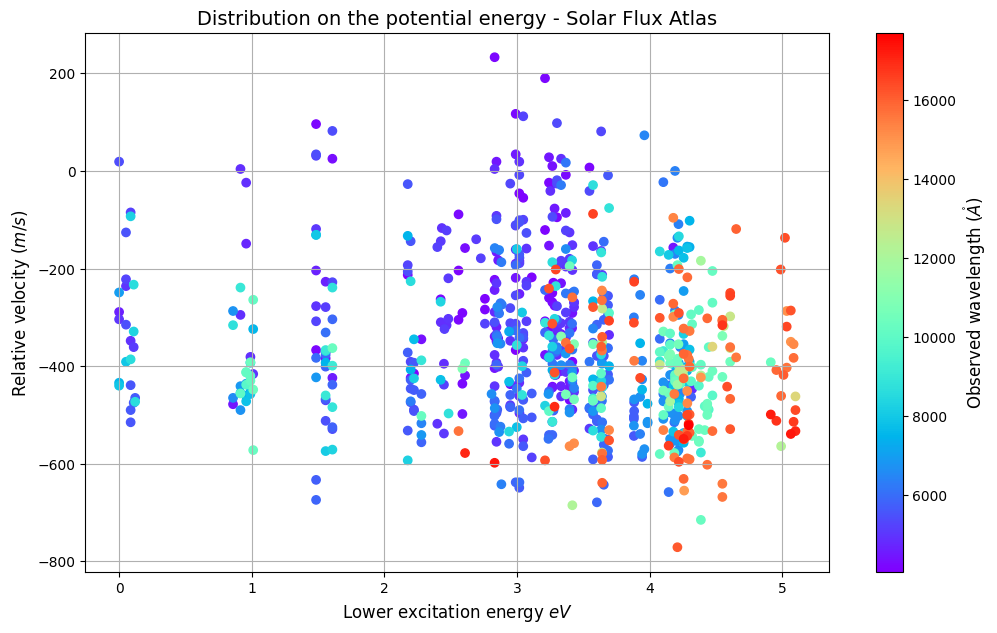

In [5]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Velocity'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

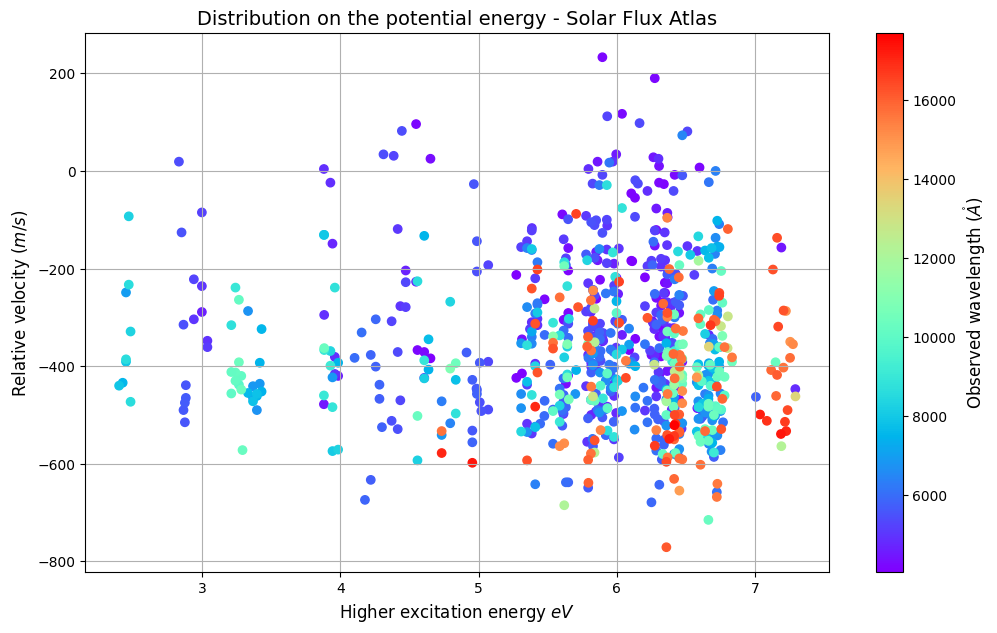

In [6]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Higher potential'],Energy_data['Velocity'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Higher excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Relative velocity $(m/s)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

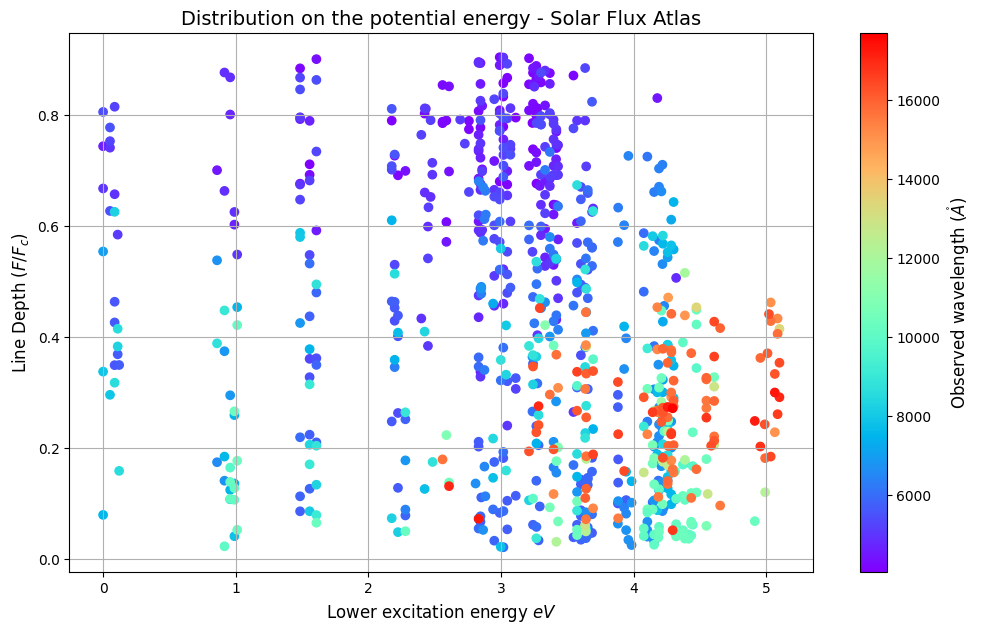

In [7]:
fig3, ax = plt.subplots(1,1,figsize=(12,7))

scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Line Depth'],c=Energy_data['Wave A'],cmap='rainbow',lw=1,marker='o')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Distribution on the potential energy - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower excitation energy $eV$',fontsize=12)
ax.set_ylabel(r'Line Depth $(F/F_c)$',fontsize=12)
ax.grid()

# fig3.savefig('Standard curve_Gray.pdf')

### Chromodependence on the chromodependence

## Fix velocity: plot line depth vs lower potential energy

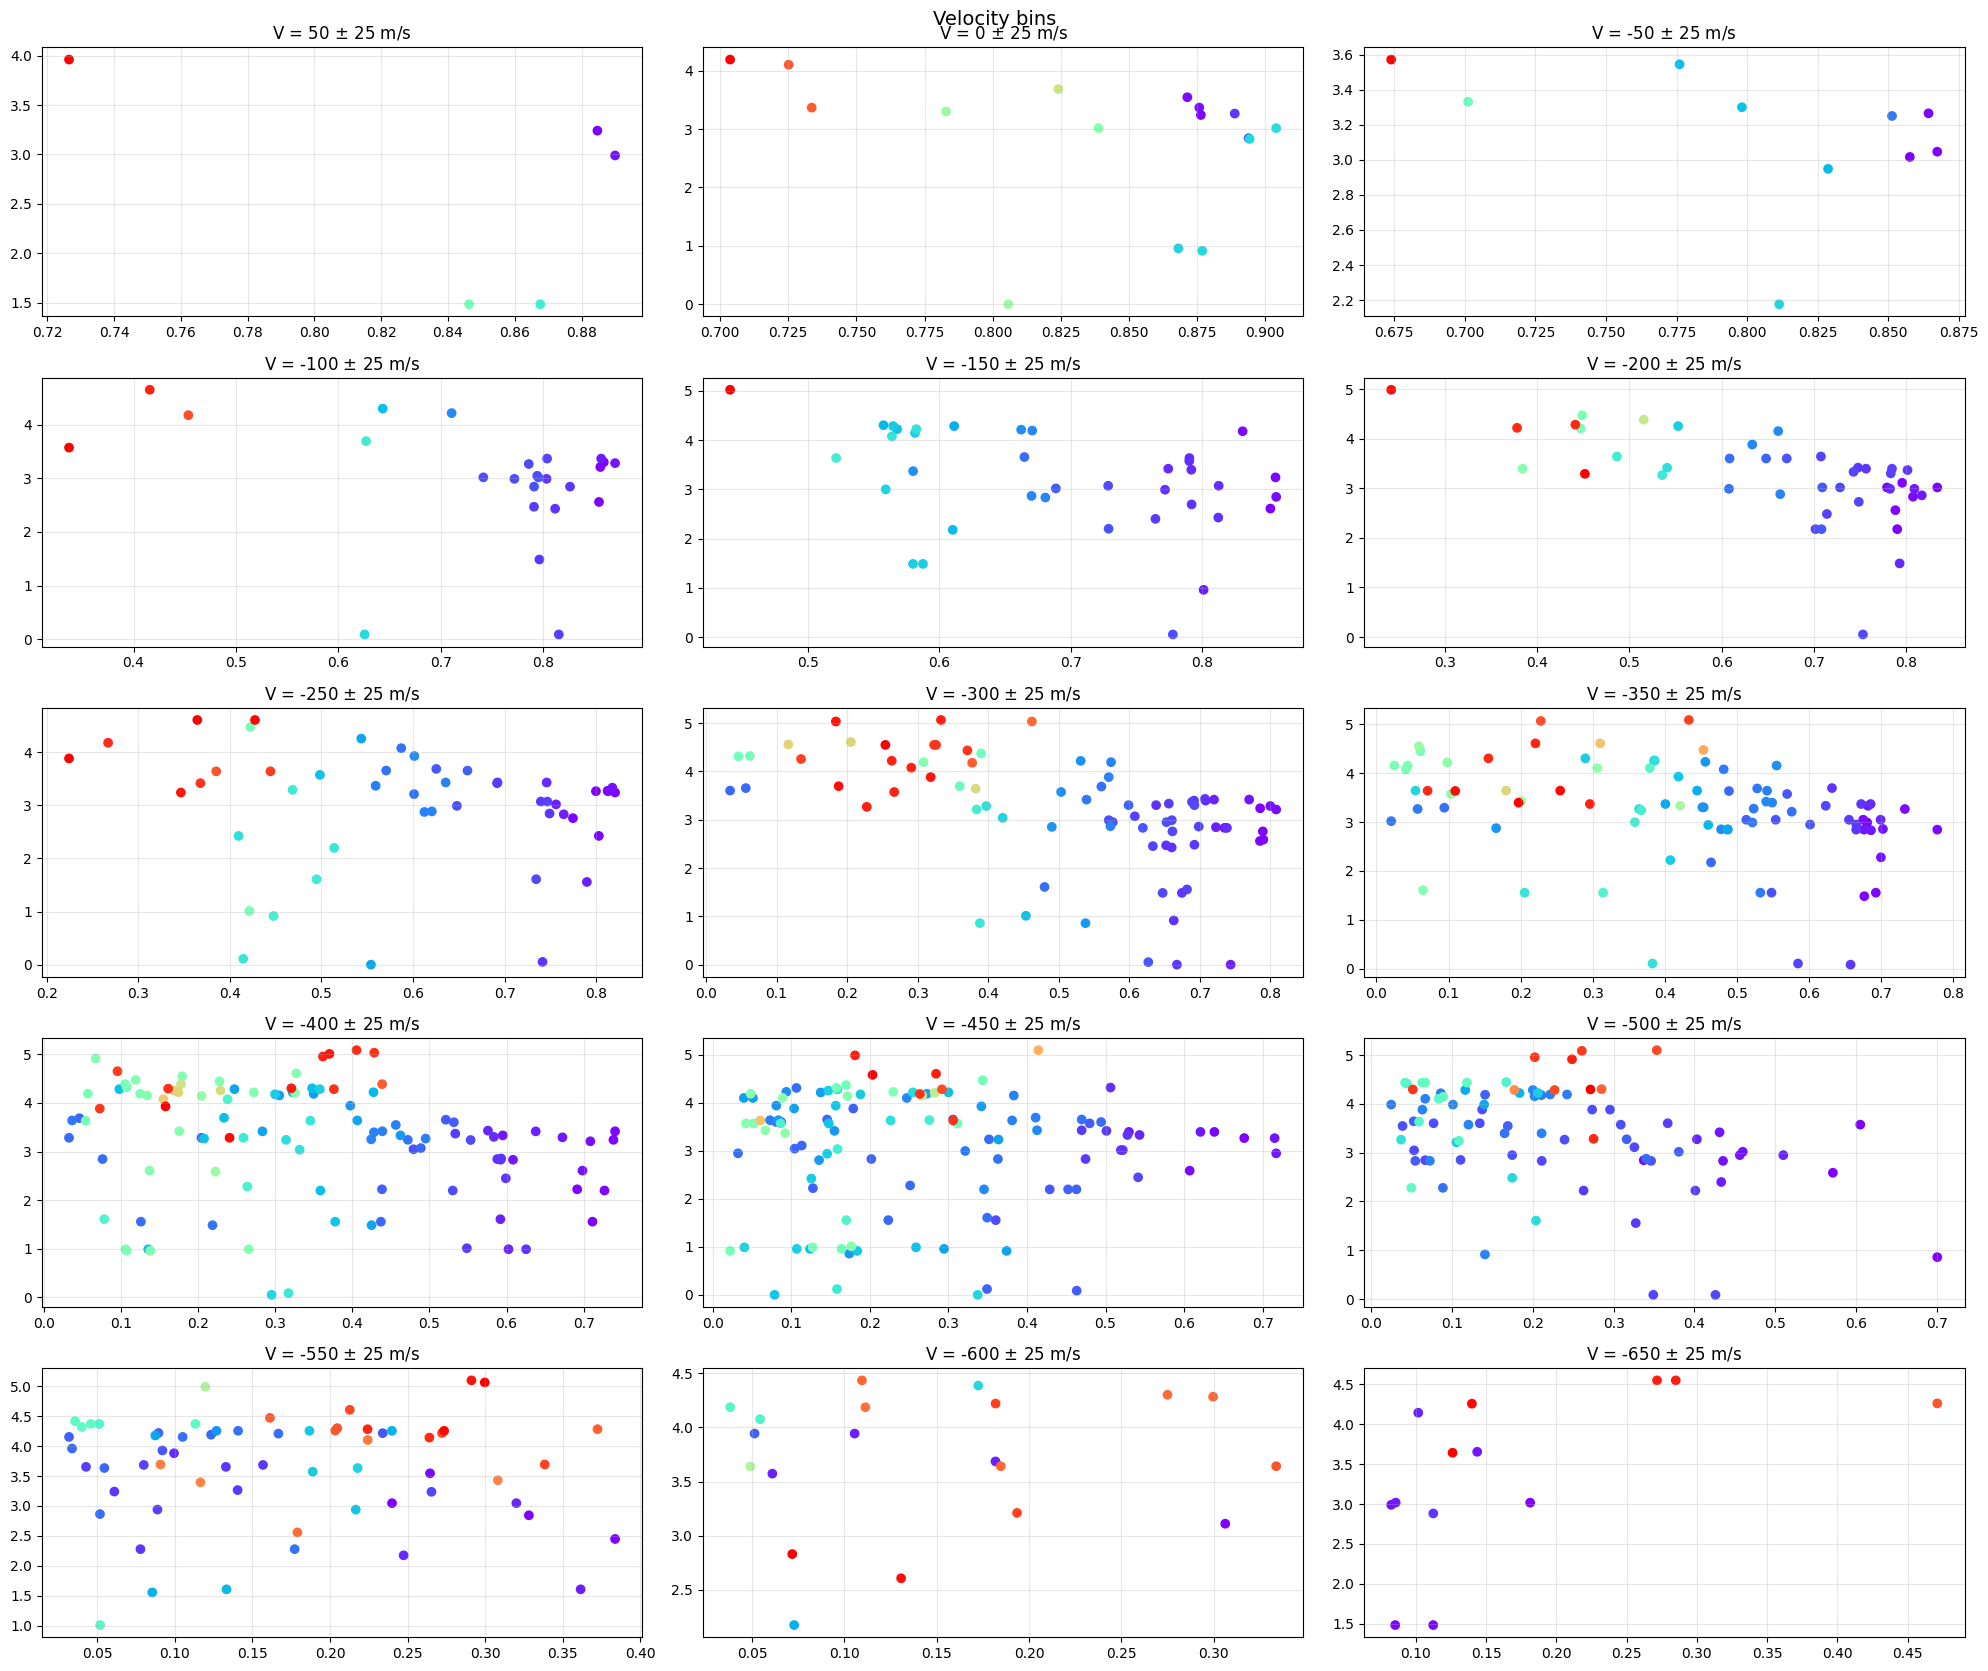

In [66]:
#Organize the dataframe wtih ascending velocities
listed = ALL_data.sort_values('Velocity', ascending=False, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [50, 0,-50,-100,-150,-200,-250,-300,-350,-400,-450,-500,-550,-600,-650]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(Energy_data[Energy_data['Velocity'].between(each-25, each+25, inclusive='neither')])

fig, axes = plt.subplots(5, 3, figsize=(20, 17))
fig.suptitle('Velocity bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Line Depth'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

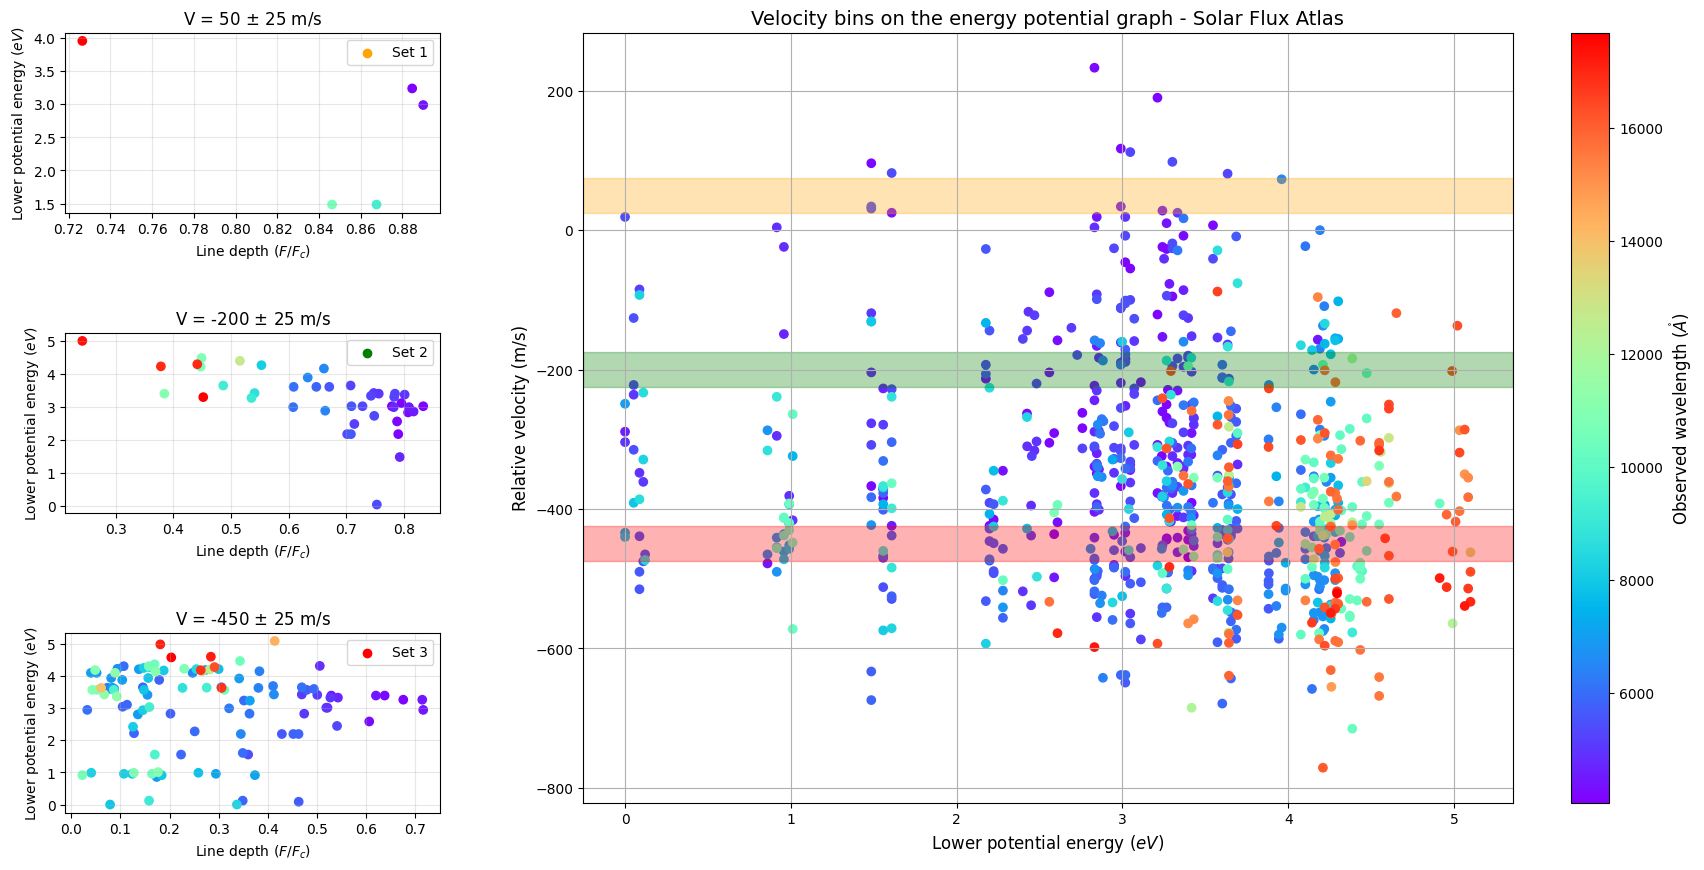

In [62]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Velocity'],c=Energy_data['Wave A'],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Velocity bins on the energy potential graph - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower potential energy $(eV)$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_ALL[i]['Line Depth'],velocity_ALL[i]['Lower potential'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'V = {markers[i]} $\pm$ 25 m/s')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_ylabel(r'Lower potential energy $(eV)$')
ax_inseti.set_xlabel(r'Line depth $(F/F_{c})$')
ax_inseti.legend()

j=5
ax_insetj.scatter(velocity_ALL[j]['Line Depth'],velocity_ALL[j]['Lower potential'],c=velocity_ALL[j]["Wave A"],cmap='rainbow')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'V = {markers[j]} $\pm$ 25 m/s')
ax_insetj.set_ylabel(r'Lower potential energy $(eV)$')
ax_insetj.set_xlabel(r'Line depth $(F/F_{c})$')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=10
ax_insetk.scatter(velocity_ALL[k]['Line Depth'],velocity_ALL[k]['Lower potential'],c=velocity_ALL[k]["Wave A"],cmap='rainbow')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'V = {markers[k]} $\pm$ 25 m/s')
ax_insetk.set_ylabel(r'Lower potential energy $(eV)$')
ax_insetk.set_xlabel(r'Line depth $(F/F_{c})$')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-25, markers[i]+25, alpha=0.3, color='orange')
ax.axhspan(markers[j]-25, markers[j]+25, alpha=0.3, color='green')
ax.axhspan(markers[k]-25, markers[k]+25, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins SPA_plot.pdf', bbox_inches='tight')

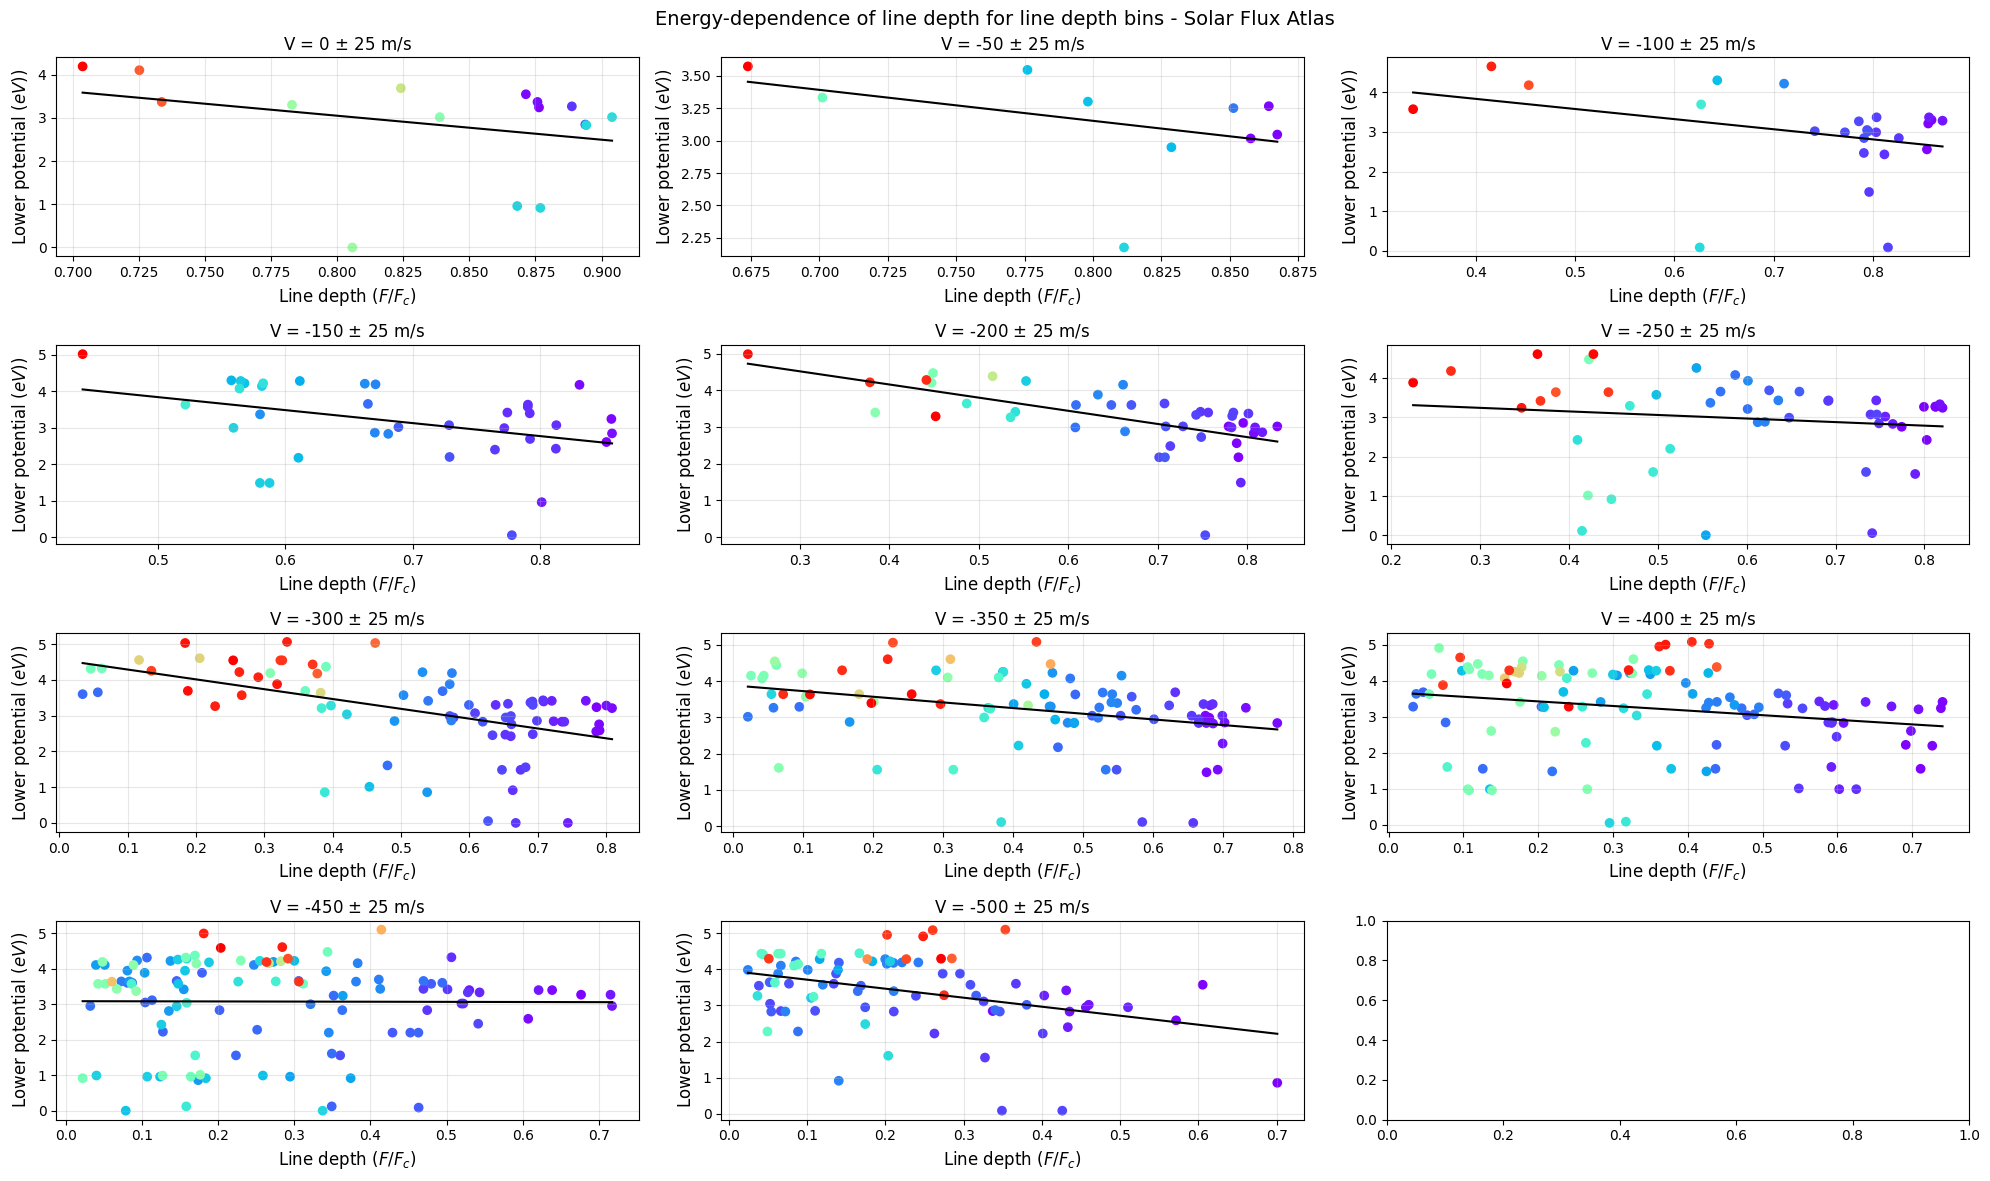

In [48]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(1,12):
    new_data = velocity_ALL[i]
    _,cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    pol = Polynomial.fit(new_data['Line Depth'],new_data['Lower potential'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    flux_fit = poly.polyval(values_flux,param)
    cov_SPA.append(np.sqrt(np.diag(cov)))

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Pendiente','Corte']
values_param_SPA = values_param_SPA.set_axis(markers[1:12], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_ALL[1:12]
markers_new = markers[1:12]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Energy-dependence of line depth for line depth bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Lower potential'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_ylabel(r'Lower potential $(eV))$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [49]:
cov = [each[0] for each in cov_SPA]
values_param_SPA['Error A'] = cov
values_param_SPA

,Pendiente,Corte,Error A
0,7.489843,-5.551382,4.565812
-50,5.065001,-2.390112,1.891224
-100,4.855101,-2.554747,1.488527
-150,5.625131,-3.568525,1.451560
-200,5.597308,-3.590539,0.713592
-250,3.511711,-0.905882,0.996054
-300,4.565202,-2.748746,0.532871
-350,3.882044,-1.561790,0.468385
-400,3.686983,-1.279855,0.563536
-450,3.084433,-0.039546,0.683612


In [50]:
cov_SPA

[array([4.565812  , 3.82454486]),
 array([1.89122367, 1.5235125 ]),
 array([1.48852656, 1.11755238]),
 array([1.45155978, 1.01252169]),
 array([0.71359189, 0.48099142]),
 array([0.99605441, 0.61368364]),
 array([0.53287135, 0.29501682]),
 array([0.4683855 , 0.22011247]),
 array([0.56353647, 0.22356189]),
 array([0.68361155, 0.21778799]),
 array([0.69556485, 0.18340115])]

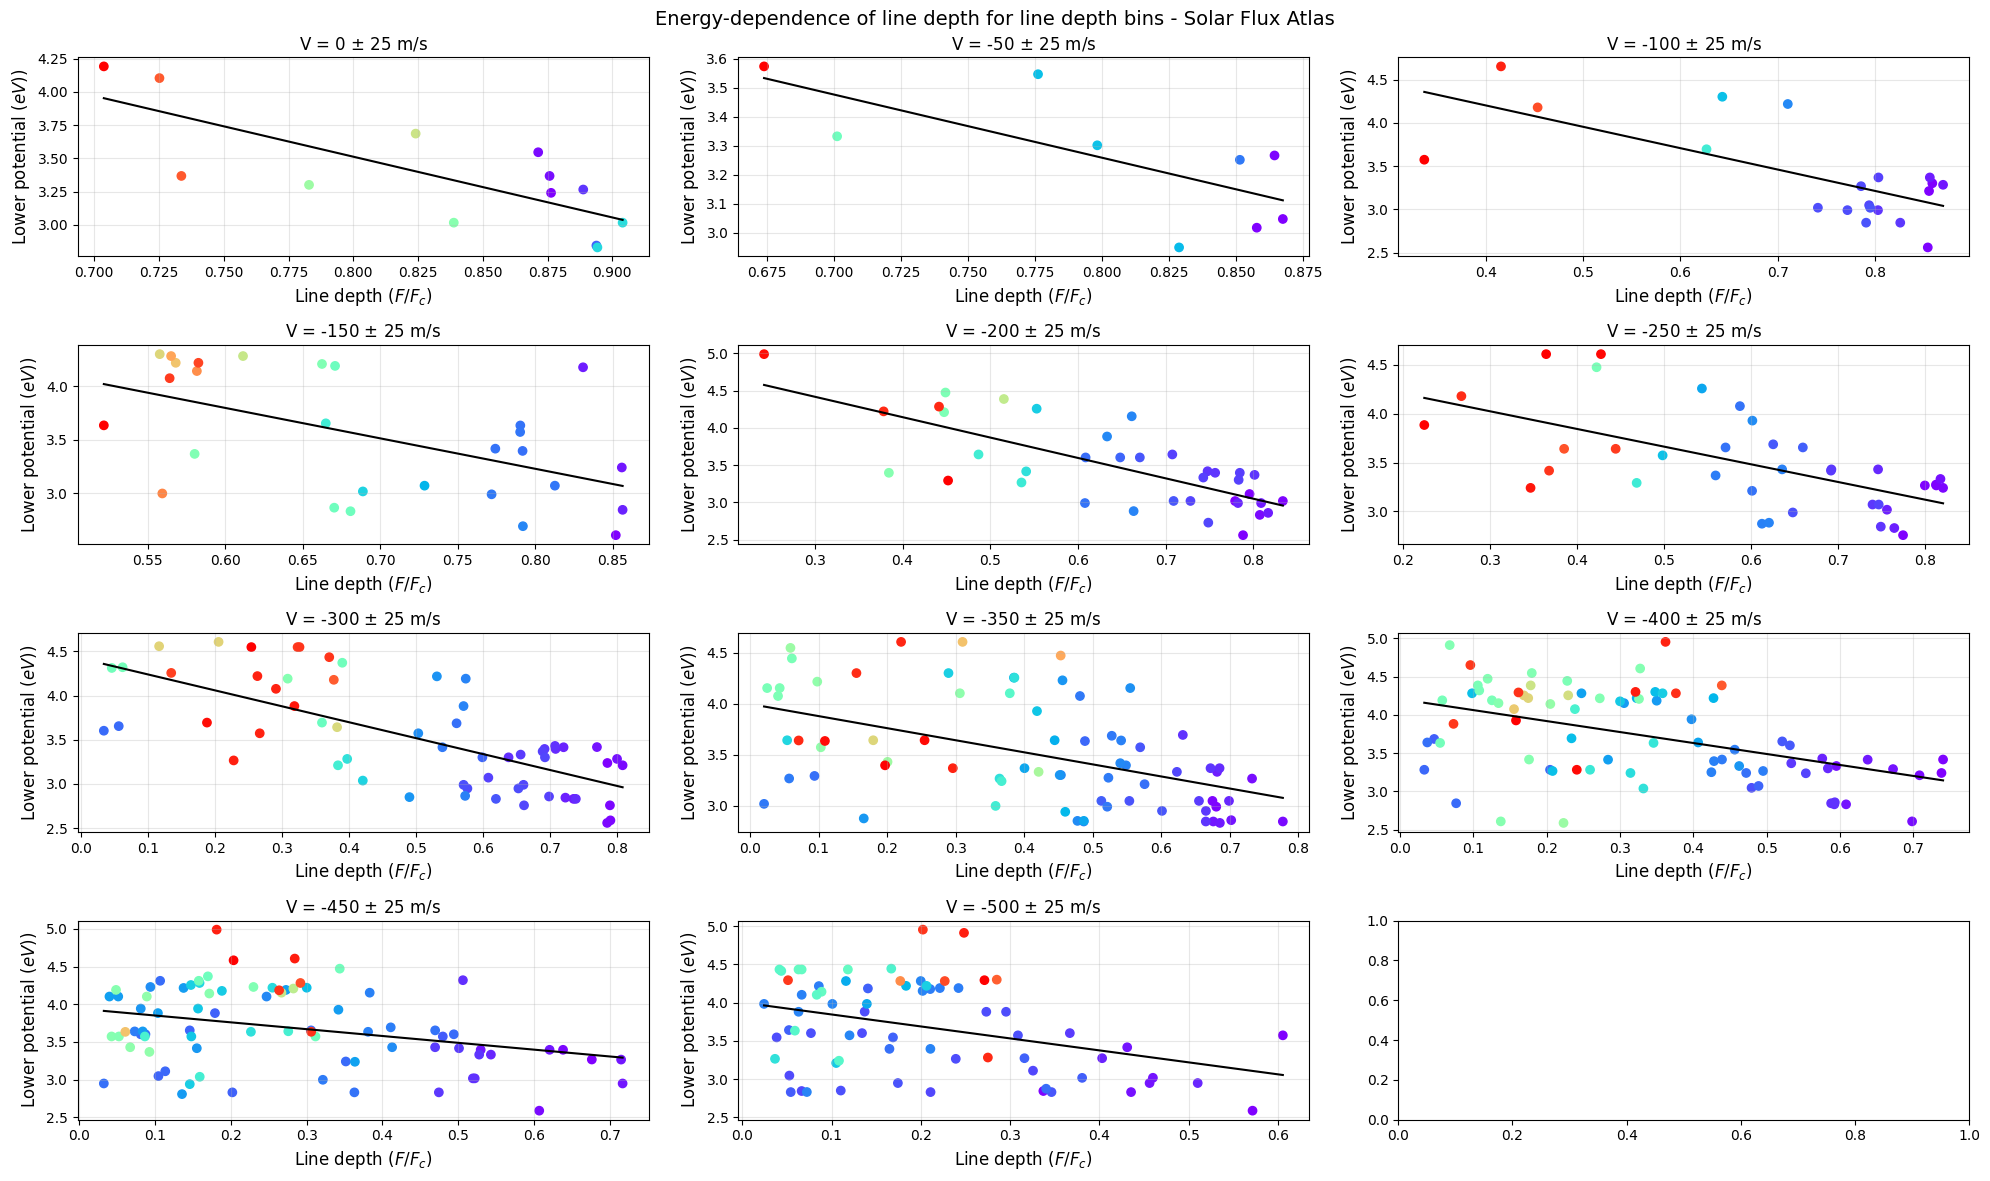

In [ ]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(1,12):
    new_data = velocity_ALL[i][velocity_ALL[i]['Lower potential'].between(2.5,5,inclusive='right')]
    _,cov = np.polyfit(new_data['Line Depth'],new_data['Lower potential'], 1,cov=True)
    pol = Polynomial.fit(new_data['Line Depth'],new_data['Lower potential'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Line Depth']), max(new_data['Line Depth']), len(new_data['Line Depth']))
    flux_fit = poly.polyval(values_flux,param)
    cov_SPA.append(np.sqrt(np.diag(cov)))

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Corte','Pendiente']
values_param_SPA = values_param_SPA.set_axis(markers[1:12], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_ALL[1:12]
markers_new = markers[1:12]

fig5, axes = plt.subplots(4, 3, figsize=(20, 12))
fig5.suptitle('Energy-dependence of line depth for line depth bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Line Depth'],wave_SPA[i]['Lower potential'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'V = {markers_new[i]} $\pm$ 25 m/s')
        ax.set_xlabel(r'Line depth $(F/F_{c})$',fontsize=12)
        ax.set_ylabel(r'Lower potential $(eV))$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [68]:
cov = [each[0] for each in cov_SPA]
values_param_SPA['Error A'] = cov
values_param_SPA

,Pendiente,Corte,Error A
0,7.163611,-4.563852,1.156457
-50,5.000523,-2.178140,0.806995
-100,5.189975,-2.471903,0.601988
-150,5.505841,-2.846569,0.871931
-200,5.237640,-2.737621,0.416873
-250,4.565257,-1.806143,0.393670
-300,4.418836,-1.801221,0.244648
-350,3.997556,-1.184274,0.246815
-400,4.206292,-1.434225,0.298061
-450,3.941546,-0.905485,0.294572


## Fix line depth: plot potential energy vs velocity 

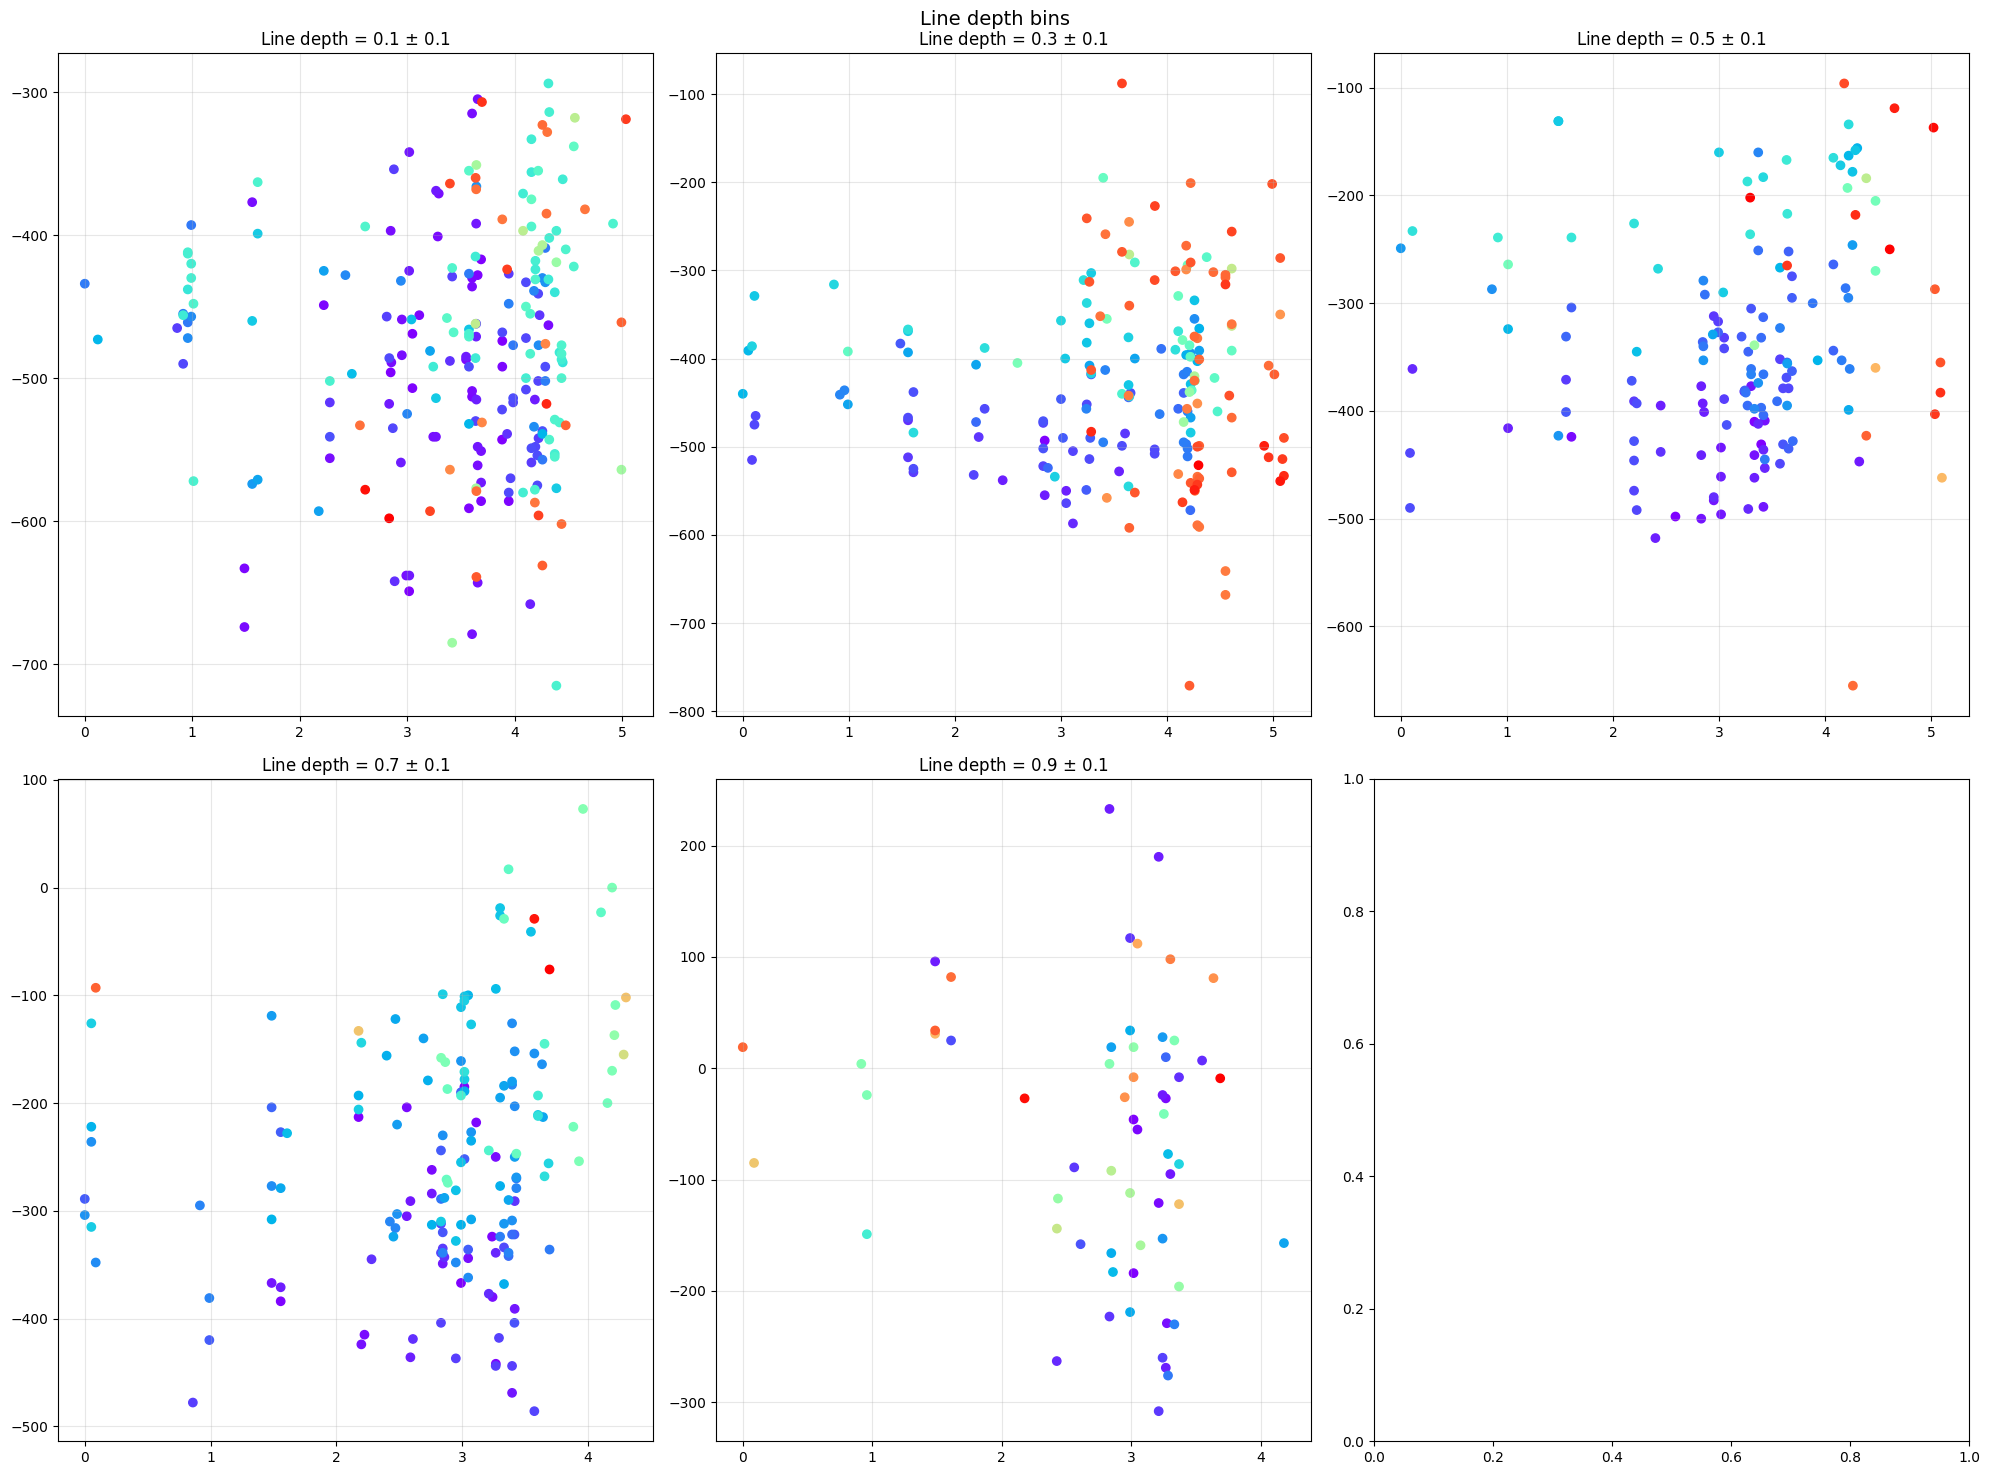

In [73]:
#Organize the dataframe wtih ascending velocities
ALL_data['Line Depth'] = 1- ALL_data['Flux']
listed = ALL_data.sort_values('Line Depth', ascending=True, na_position='first').reset_index(drop=True)
velocity_ALL = []

#Make the markers like profesor Benjamin
markers = [0.1,0.3,0.5,0.7,0.9]

for each in markers:
    #Take the velocity bins of 50 m/s each one
    velocity_ALL.append(Energy_data[Energy_data['Line Depth'].between(each-0.1, each+0.1, inclusive='neither')])

fig, axes = plt.subplots(2, 3, figsize=(20, 15))
fig.suptitle('Line depth bins',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(markers):
        ax.scatter(velocity_ALL[i]['Lower potential'],velocity_ALL[i]['Velocity'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
        ax.set_title(f'Line depth = {markers[i]} $\pm$ 0.1')
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

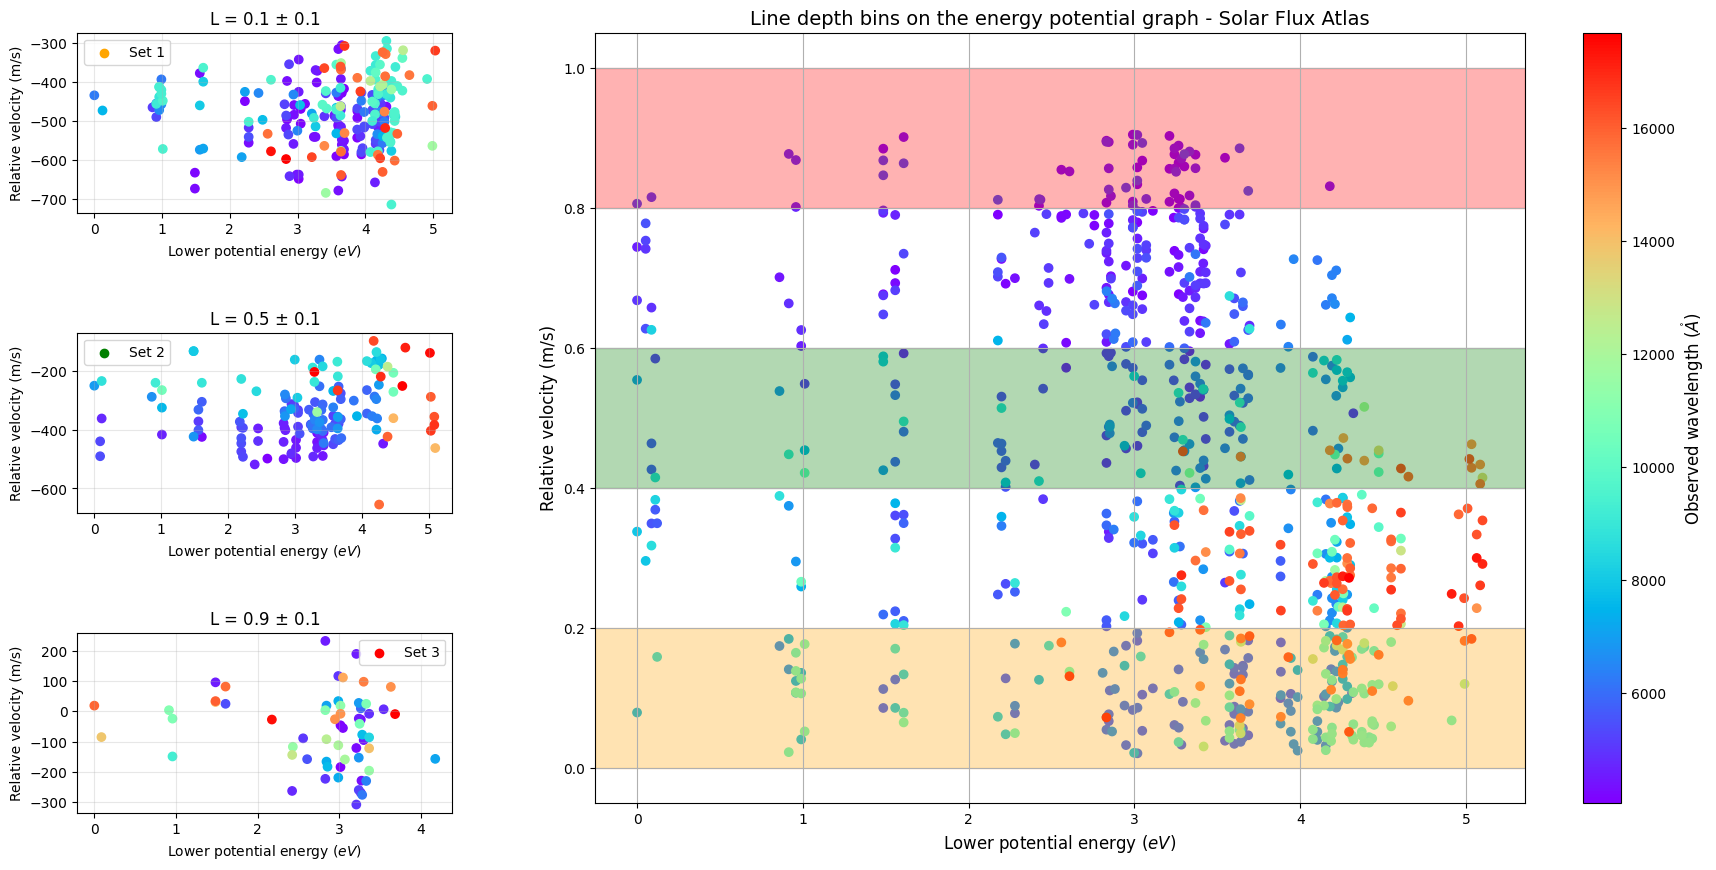

In [57]:
#Another form to graph
# Crear figura principal
fig, ax = plt.subplots(figsize=(15, 10))
scatter = ax.scatter(Energy_data['Lower potential'],Energy_data['Line Depth'],c=Energy_data['Wave A'],cmap='rainbow',lw=1)

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label(r'Observed wavelength $(\mathring{A})$', fontsize=12)

ax.set_title('Line depth bins on the energy potential graph - Solar Flux Atlas',fontsize=14)
ax.set_xlabel(r'Lower potential energy $(eV)$',fontsize=12)
ax.set_ylabel(r'Relative velocity (m/s)',fontsize=12)
ax.grid()

# Crear gráfica insertada
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Definir posición y tamaño de la gráfica insertada [left, bottom, width, height]
ax_inseti = fig.add_axes([-0.22, 0.7, 0.25, 0.18])
ax_insetj = fig.add_axes([-0.22, 0.4, 0.25, 0.18])
ax_insetk = fig.add_axes([-0.22, 0.1, 0.25, 0.18])

# Graficar el zoom en la región de interés
i=0
ax_inseti.scatter(velocity_ALL[i]['Lower potential'],velocity_ALL[i]['Velocity'],c=velocity_ALL[i]["Wave A"],cmap='rainbow')
ax_inseti.scatter([],[], c='orange', label='Set 1')
ax_inseti.set_title(f'L = {markers[i]} $\pm$ 0.1')
ax_inseti.grid(True, alpha=0.3)
ax_inseti.set_xlabel(r'Lower potential energy $(eV)$')
ax_inseti.set_ylabel(r'Relative velocity (m/s)')
ax_inseti.legend()

j=2
ax_insetj.scatter(velocity_ALL[j]['Lower potential'],velocity_ALL[j]['Velocity'],c=velocity_ALL[j]["Wave A"],cmap='rainbow')
ax_insetj.scatter([],[], c='green', label='Set 2')
ax_insetj.set_title(f'L = {markers[j]} $\pm$ 0.1')
ax_insetj.set_xlabel(r'Lower potential energy $(eV)$')
ax_insetj.set_ylabel(r'Relative velocity (m/s)')
ax_insetj.grid(True, alpha=0.3)
ax_insetj.legend()

k=4
ax_insetk.scatter(velocity_ALL[k]['Lower potential'],velocity_ALL[k]['Velocity'],c=velocity_ALL[k]["Wave A"],cmap='rainbow')
ax_insetk.scatter([],[], c='red', label='Set 3')
ax_insetk.set_title(f'L = {markers[k]} $\pm$ 0.1')
ax_insetk.set_xlabel(r'Lower potential energy $(eV)$')
ax_insetk.set_ylabel(r'Relative velocity (m/s)')
ax_insetk.grid(True, alpha=0.3)
ax_insetk.legend()


# Marcar la región del zoom en la gráfica principal
ax.axhspan(markers[i]-0.1, markers[i]+0.1, alpha=0.3, color='orange')
ax.axhspan(markers[j]-0.1, markers[j]+0.1, alpha=0.3, color='green')
ax.axhspan(markers[k]-0.1, markers[k]+0.1, alpha=0.3, color='red')

plt.show()

# fig.savefig('Velocity bins SPA_plot.pdf', bbox_inches='tight')

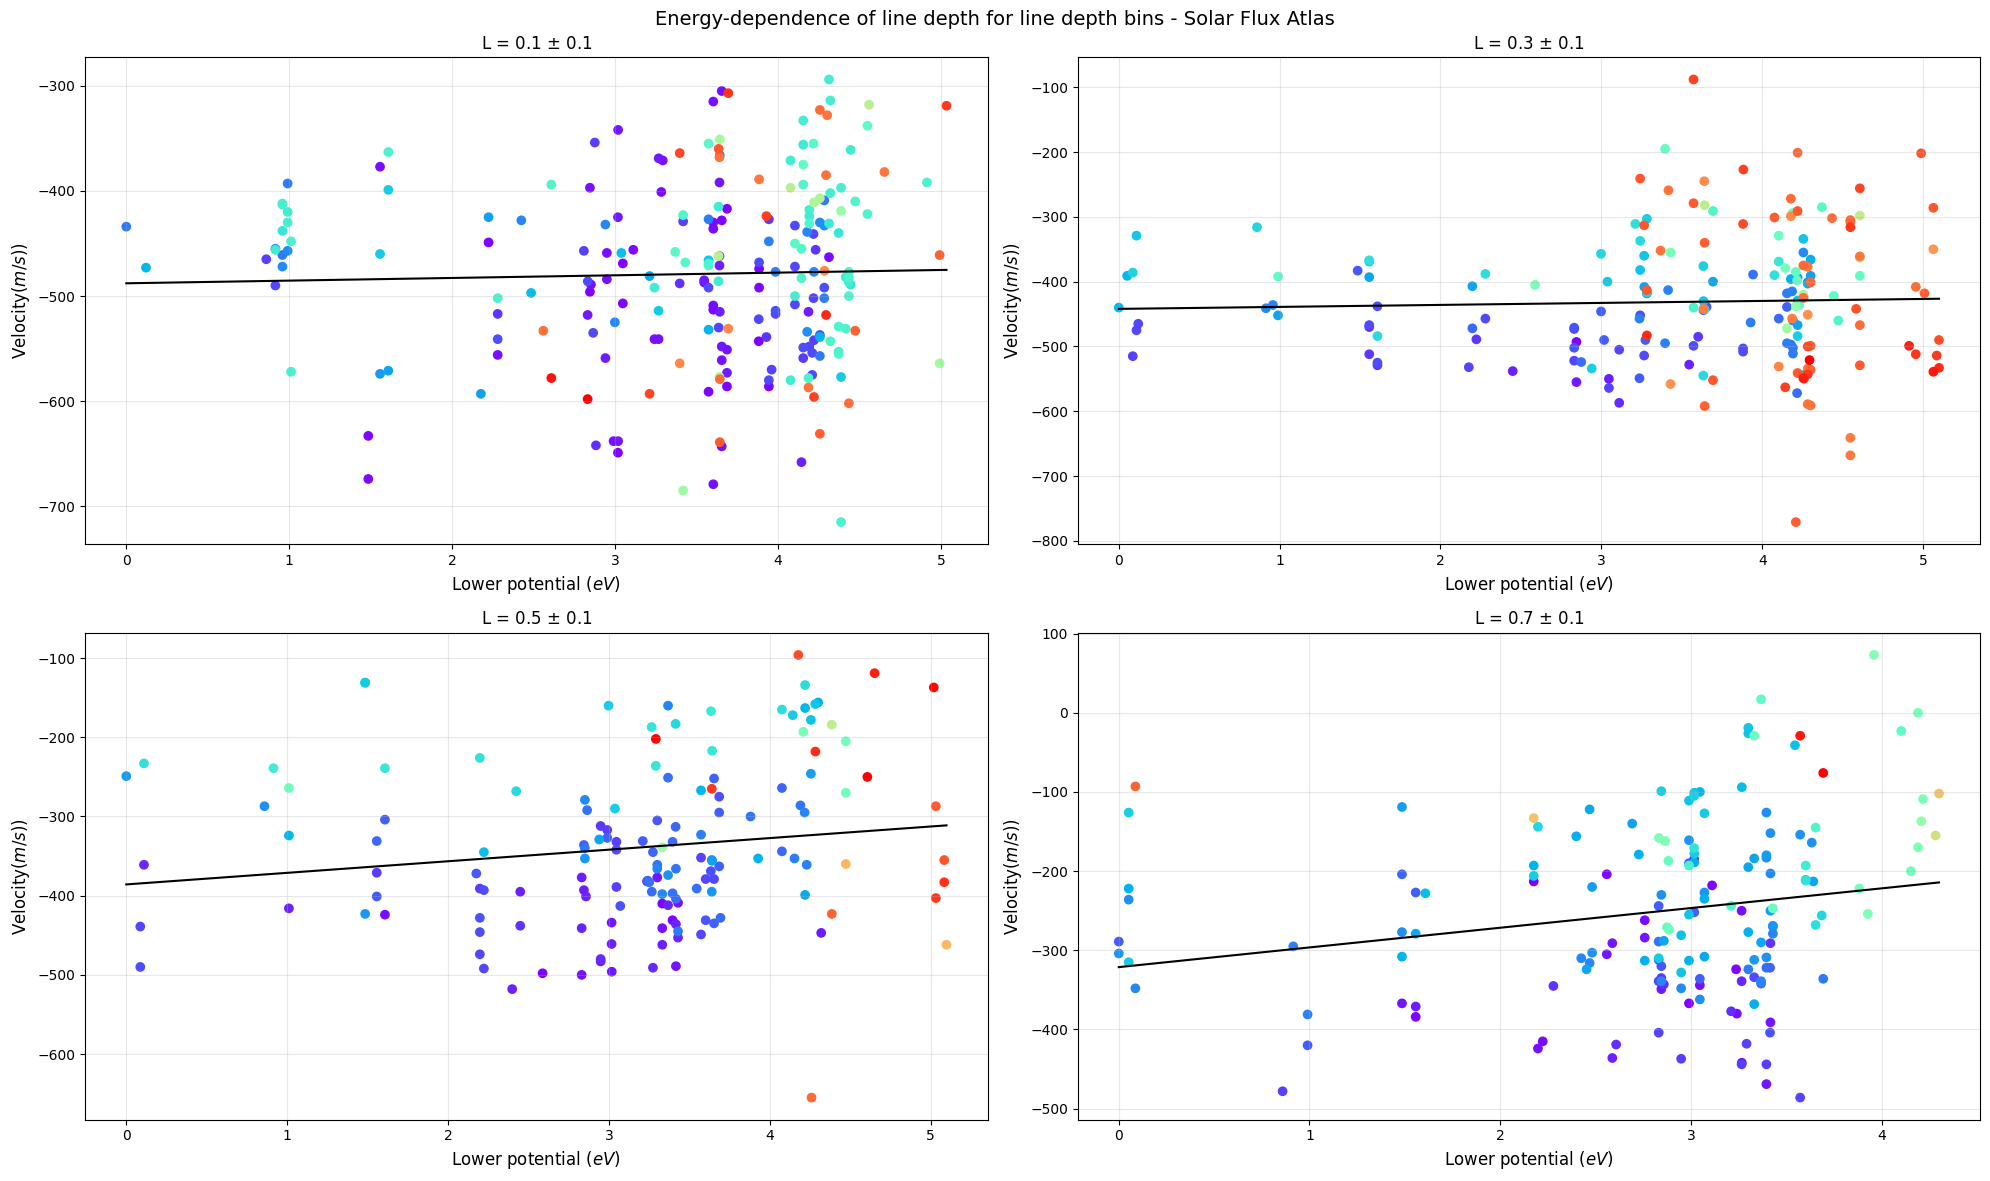

In [71]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(0,4):
    new_data = velocity_ALL[i]
    pol,cov = np.polyfit(new_data['Lower potential'],new_data['Velocity'], 1,cov=True)
    pol = Polynomial.fit(new_data['Lower potential'],new_data['Velocity'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Lower potential']), max(new_data['Lower potential']), len(new_data['Lower potential']))
    flux_fit = poly.polyval(values_flux,param)
    cov_SPA.append(np.sqrt(np.diag(cov)))

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Corte','Pendiente']
values_param_SPA = values_param_SPA.set_axis(markers[0:4], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_ALL[0:4]
markers_new = markers[0:4]

fig5, axes = plt.subplots(2, 2, figsize=(20, 12))
fig5.suptitle('Energy-dependence of line depth for line depth bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Lower potential'],wave_SPA[i]['Velocity'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'L = {markers_new[i]} $\pm$ 0.1')
        ax.set_xlabel(r'Lower potential $(eV)$',fontsize=12)
        ax.set_ylabel(r'Velocity$(m/s))$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [72]:
cov = [each[0] for each in cov_SPA]
values_param_SPA['Error A'] = cov
values_param_SPA

,Corte,Pendiente,Error A
0.1,-487.862620,2.533961,5.497163
0.3,-442.014541,3.072025,6.262339
0.5,-385.784298,14.626064,7.782083
0.7,-321.233112,24.868603,9.316923


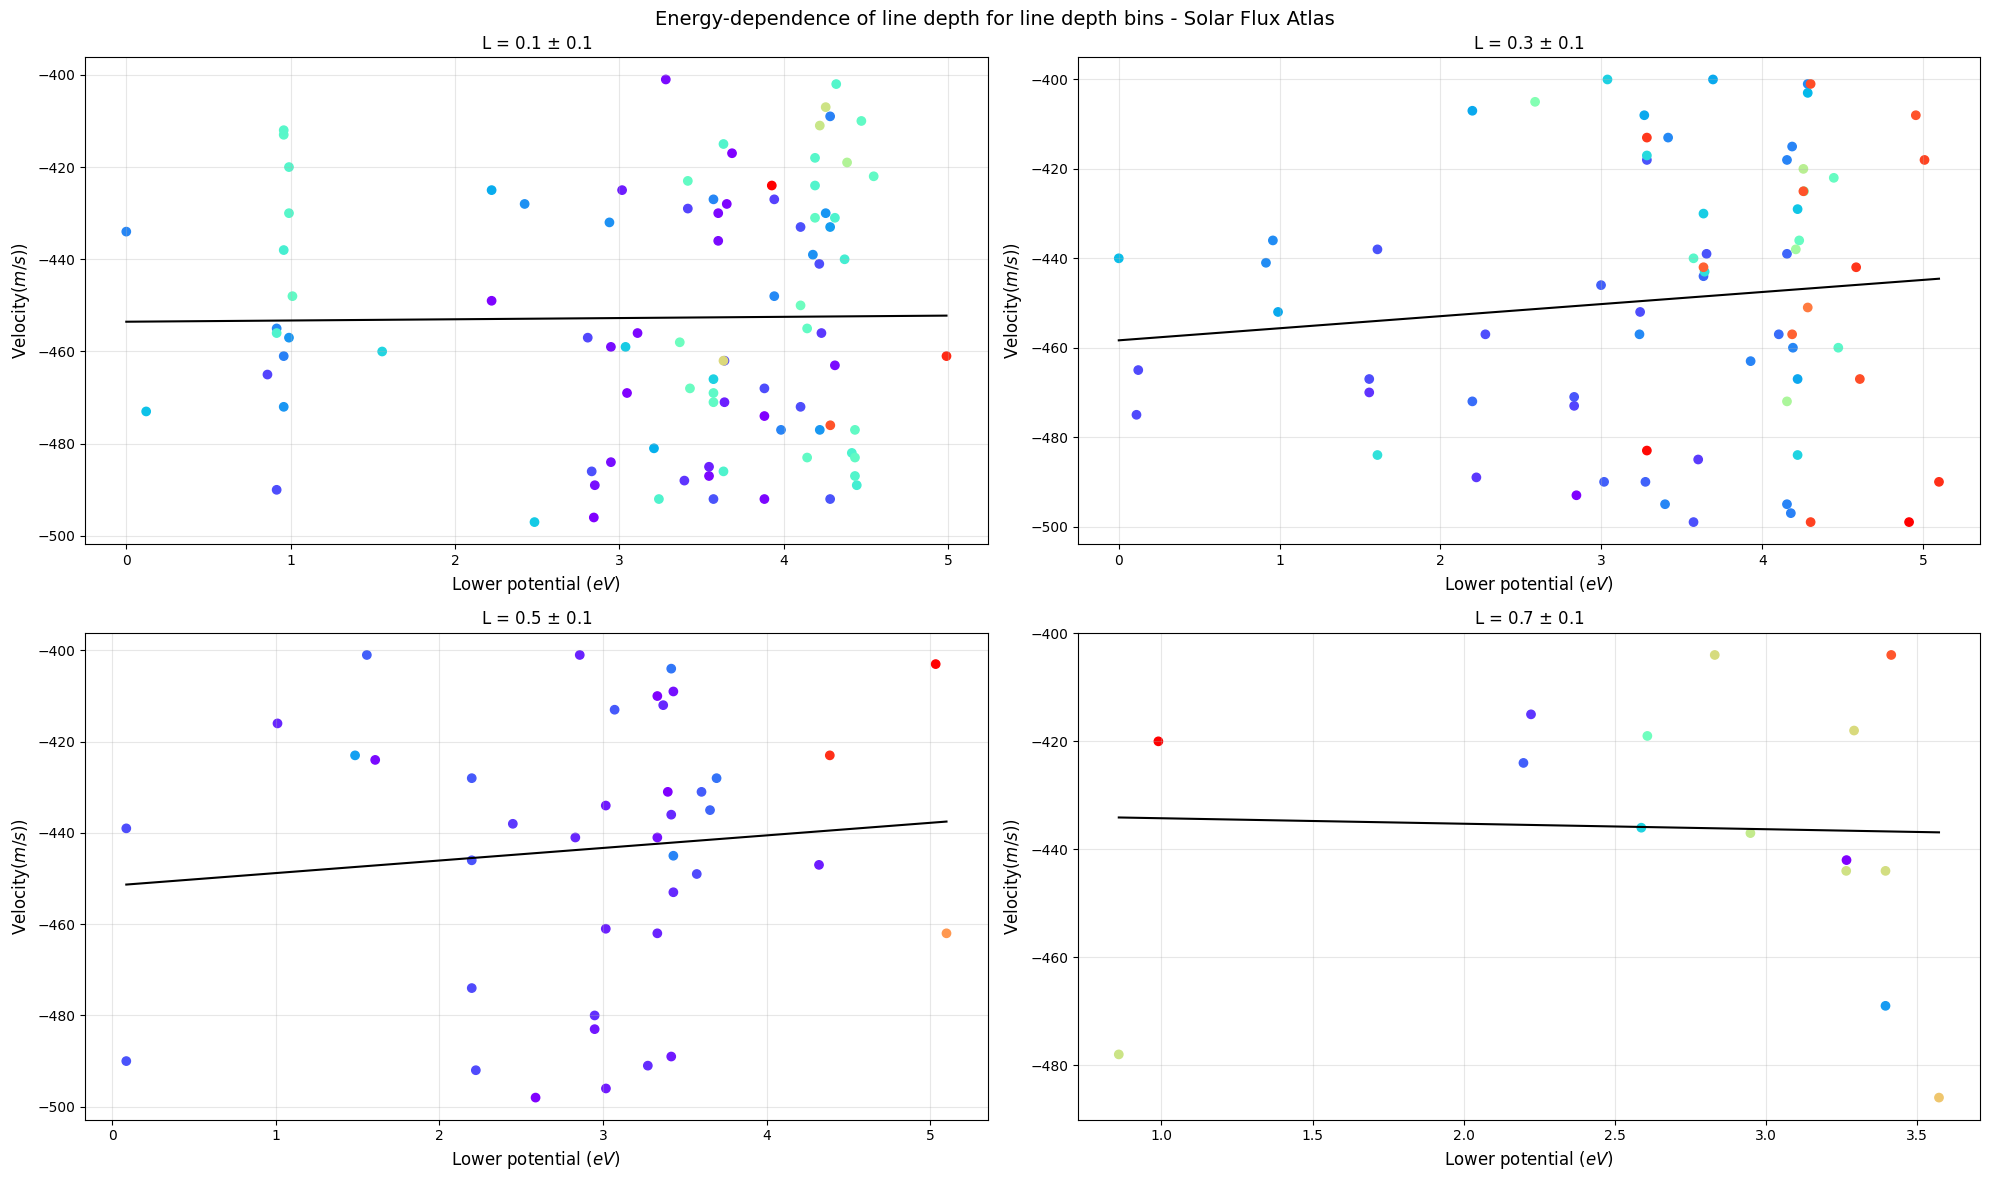

In [75]:
#Just select the numerous one and have the range 4300 - 6000 A
fits_SPA = []
values_param_SPA = []
wave_SPA = []
cov_SPA = []

for i in range(0,4):
    new_data = velocity_ALL[i][velocity_ALL[i]['Velocity'].between(-500,-400, inclusive='right')]
    _,cov = np.polyfit(new_data['Lower potential'],new_data['Velocity'], 1,cov=True)
    pol = Polynomial.fit(new_data['Lower potential'],new_data['Velocity'], 1)
    param = pol.convert().coef
    values_flux = np.linspace(min(new_data['Lower potential']), max(new_data['Lower potential']), len(new_data['Lower potential']))
    flux_fit = poly.polyval(values_flux,param)
    cov_SPA.append(np.sqrt(np.diag(cov)))

    fits_SPA.append([values_flux,flux_fit])
    values_param_SPA.append(pd.DataFrame(param))
    wave_SPA.append(new_data)

values_param_SPA = pd.concat(values_param_SPA,axis=1).T.reset_index(drop=True)
values_param_SPA.columns = ['Corte','Pendiente']
values_param_SPA = values_param_SPA.set_axis(markers[0:4], axis=0)

#Take just the values that we want
velocity_SPA_new = velocity_ALL[0:4]
markers_new = markers[0:4]

fig5, axes = plt.subplots(2, 2, figsize=(20, 12))
fig5.suptitle('Energy-dependence of line depth for line depth bins - Solar Flux Atlas',fontsize=14)
axes = axes.flatten()

for i, ax in enumerate(axes):
    if i < len(fits_SPA):
        
        ax.scatter(wave_SPA[i]['Lower potential'],wave_SPA[i]['Velocity'],c=wave_SPA[i]["Wave A"],cmap='rainbow')
        ax.plot(fits_SPA[i][0],fits_SPA[i][1],color='k')
        ax.set_title(f'L = {markers_new[i]} $\pm$ 0.1')
        ax.set_xlabel(r'Lower potential $(eV)$',fontsize=12)
        ax.set_ylabel(r'Velocity$(m/s))$',fontsize=12)
        ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# fig5.savefig('Velocity bins SPA.pdf')

In [76]:
cov = [each[0] for each in cov_SPA]
values_param_SPA['Error A'] = cov
values_param_SPA

,Corte,Pendiente,Error A
0.1,-453.542075,0.265044,2.300030
0.3,-458.345843,2.702536,2.977376
0.5,-451.553961,2.754152,4.376957
0.7,-433.233369,-1.015874,8.275674
